In [2]:
%pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 40, 50, 55, 60, 65, 70, 78, 85, 95]
}
df = pd.DataFrame(data)

print("Data:\n", df)

Data:
    Hours  Scores
0      1      35
1      2      40
2      3      50
3      4      55
4      5      60
5      6      65
6      7      70
7      8      78
8      9      85
9     10      95


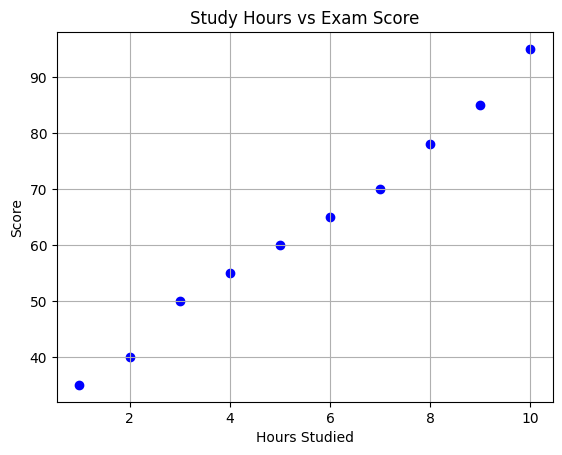

In [4]:
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [5]:
X = df[['Hours']]
y = df['Scores']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 28.46666666666666
Slope: 6.333333333333334


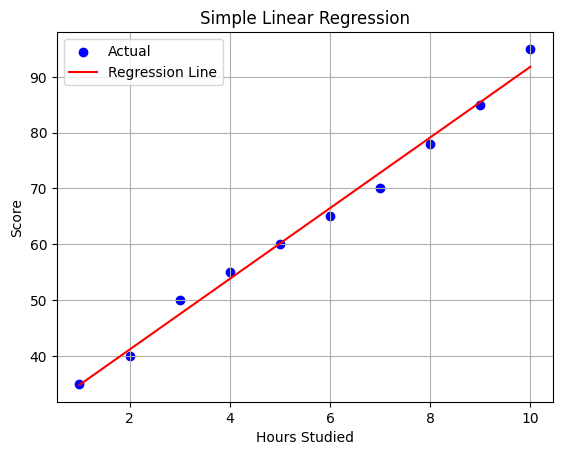

In [6]:
df['Predicted'] = model.predict(X)

plt.scatter(df['Hours'], df['Scores'], label='Actual', color='blue')
plt.plot(df['Hours'], df['Predicted'], label='Regression Line', color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(df['Scores'], df['Predicted'])
mae = mean_absolute_error(df['Scores'], df['Predicted'])
rmse = np.sqrt(mse)
r2 = r2_score(df['Scores'], df['Predicted'])

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 1.4266666666666652
MSE: 3.0933333333333253
RMSE: 1.7587874611030536
R-squared: 0.990738800235522


In [10]:
# load student performance dataset
students = pd.read_csv("C:/Users/savai/Documents/Documents/StudentsPerformance.csv")

In [11]:
print("Student Performance Data:\n", students.head())

Student Performance Data:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


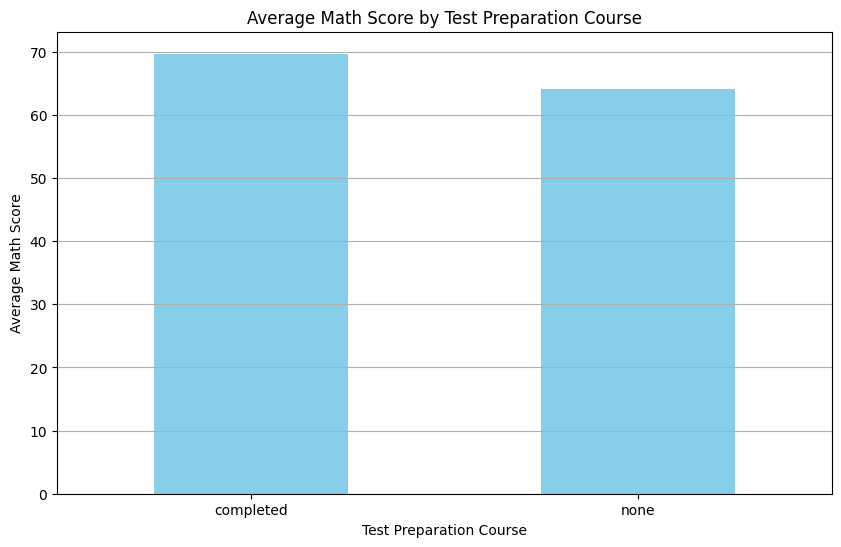

In [15]:
# visualize the relationship test preparation course and math score
plt.figure(figsize=(10, 6))
students.groupby('test preparation course')['math score'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Math Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [17]:
# Encode the categorical variable
X_encoded = pd.get_dummies(X, drop_first=True)
model.fit(X_encoded, y)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 69.69553072625699
Coefficients: [-5.61764911]


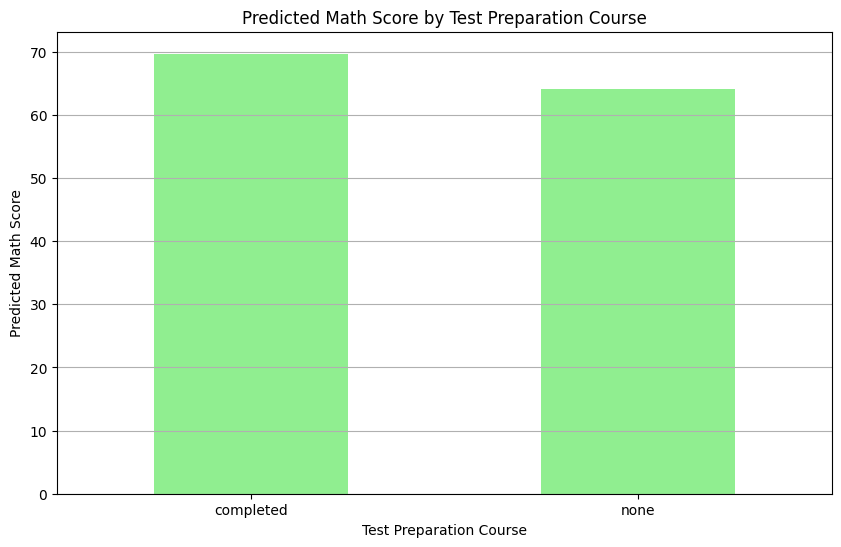

In [18]:
# predict and plot the regression line
students['Predicted Math Score'] = model.predict(pd.get_dummies(students[['test preparation course']], drop_first=True))
plt.figure(figsize=(10, 6))
students.groupby('test preparation course')['Predicted Math Score'].mean().plot(kind='bar', color='lightgreen')
plt.title('Predicted Math Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Predicted Math Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [19]:
# evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(students['math score'], students['Predicted Math Score'])
mae = mean_absolute_error(students['math score'], students['Predicted Math Score'])
rmse = np.sqrt(mse)
r2 = r2_score(students['math score'], students['Predicted Math Score'])
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 11.857640474077169
MSE: 222.4359187681651
RMSE: 14.914285727723104
R-squared: 0.03157816759687937
